# Hierarchical Clustering

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

A data frame with 50 observations on 4 variables.

- Murder numeric Murder arrests (per 100,000) (K)
- Assault numeric Assault arrests (per 100,000)
- UrbanPop numeric Percent urban population (%)
- Rape numeric Rape arrests (per 100,000) (K)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

C:\Users\drtay\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\drtay\miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\drtay\miniconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("USArrests.csv", index_col=0)

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


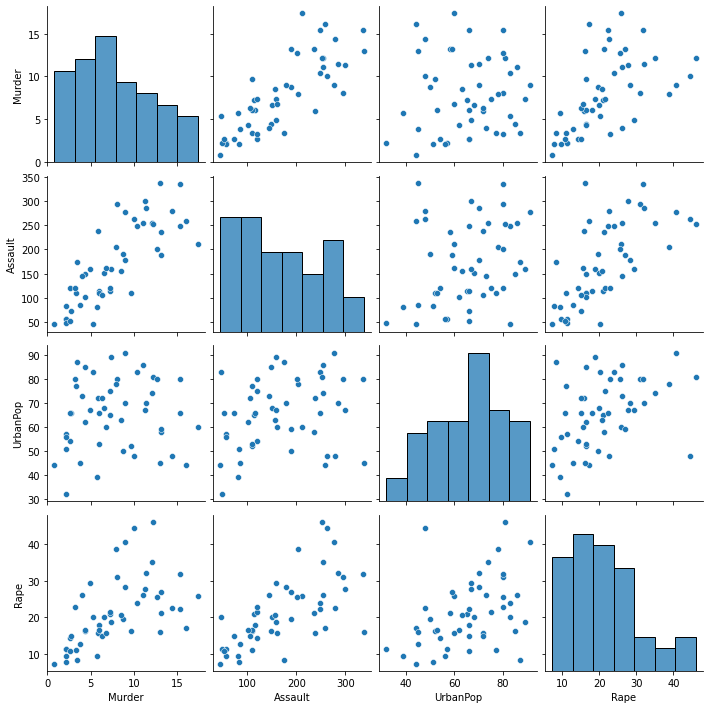

In [6]:
sns.pairplot(df);

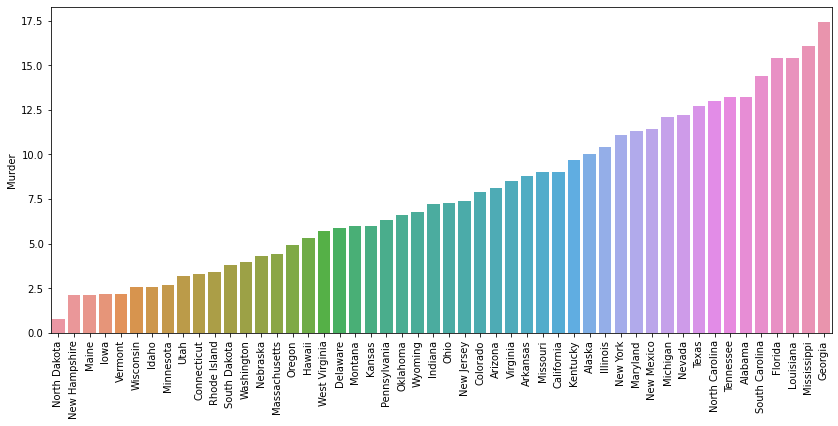

In [7]:
murder = df.Murder.sort_values()

plt.figure(figsize = (14,6))
sns.barplot(y = murder, x = murder.index)
plt.xticks(rotation = 90);

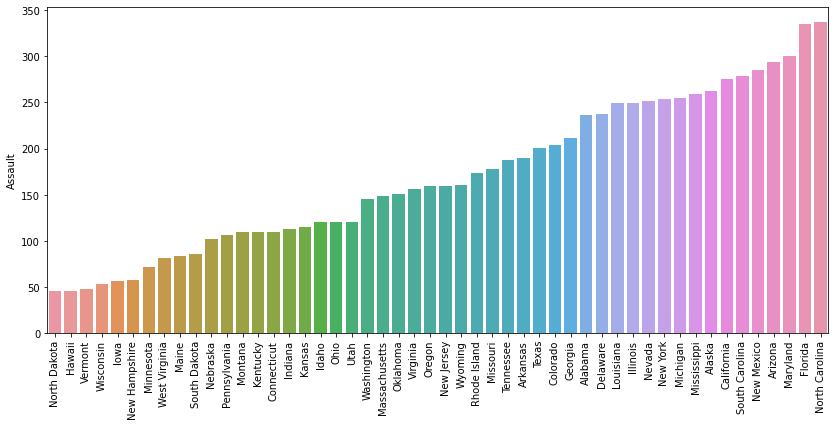

In [8]:
assault = df.Assault.sort_values()

plt.figure(figsize = (14,6))
sns.barplot(y = assault, x = assault.index)
plt.xticks(rotation = 90);

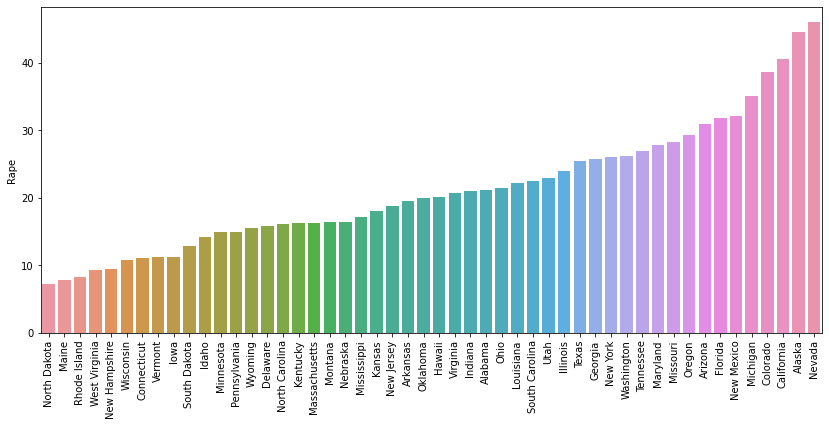

In [9]:
rape = df.Rape.sort_values()

plt.figure(figsize = (14,6))
sns.barplot(y = rape, x = rape.index)
plt.xticks(rotation = 90);

## Hopkins Test

- Hopkins test, a statistical test for randomness of a variable.
- Null Hypothesis (Ho) : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
- Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)
- The more close 0, the more available to separate clusters

In [10]:
#!pip install pyclustertend

In [10]:
from pyclustertend import hopkins

In [11]:
hopkins(df, df.shape[0])

0.44586643706035406

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
df1 = df.copy()
df2 = df.copy()

In [14]:
hopkins(MinMaxScaler().fit_transform(df1), df1.shape[0])

0.37627528127069443

In [15]:
hopkins(StandardScaler().fit_transform(df2), df2.shape[0])

0.38815916535812167

In [16]:
scaler = MinMaxScaler()

In [17]:
df_scaled = scaler.fit_transform(df)

In [18]:
X = pd.DataFrame(df_scaled, columns=df.columns)
X.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


## Dendrogram

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [20]:
#dendrogram()

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


In [21]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

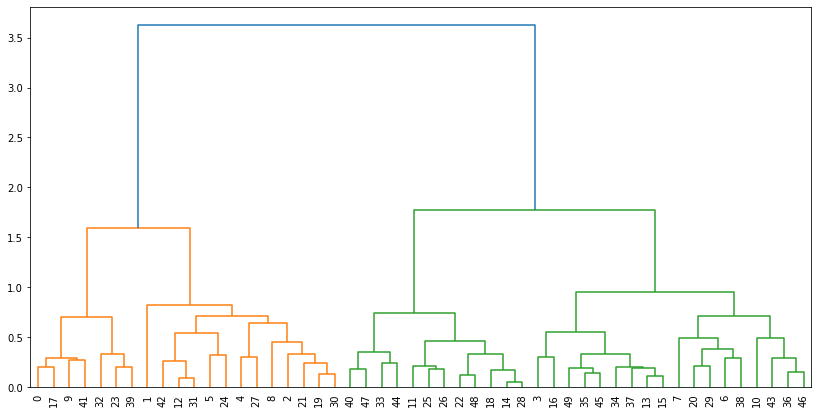

In [22]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

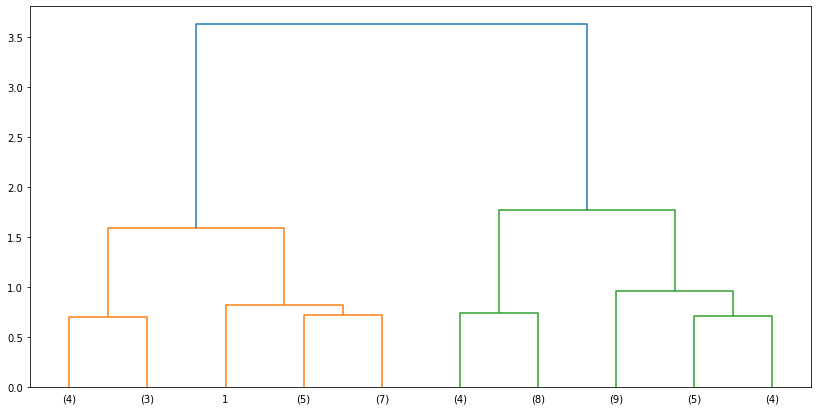

In [23]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           leaf_font_size = 10);

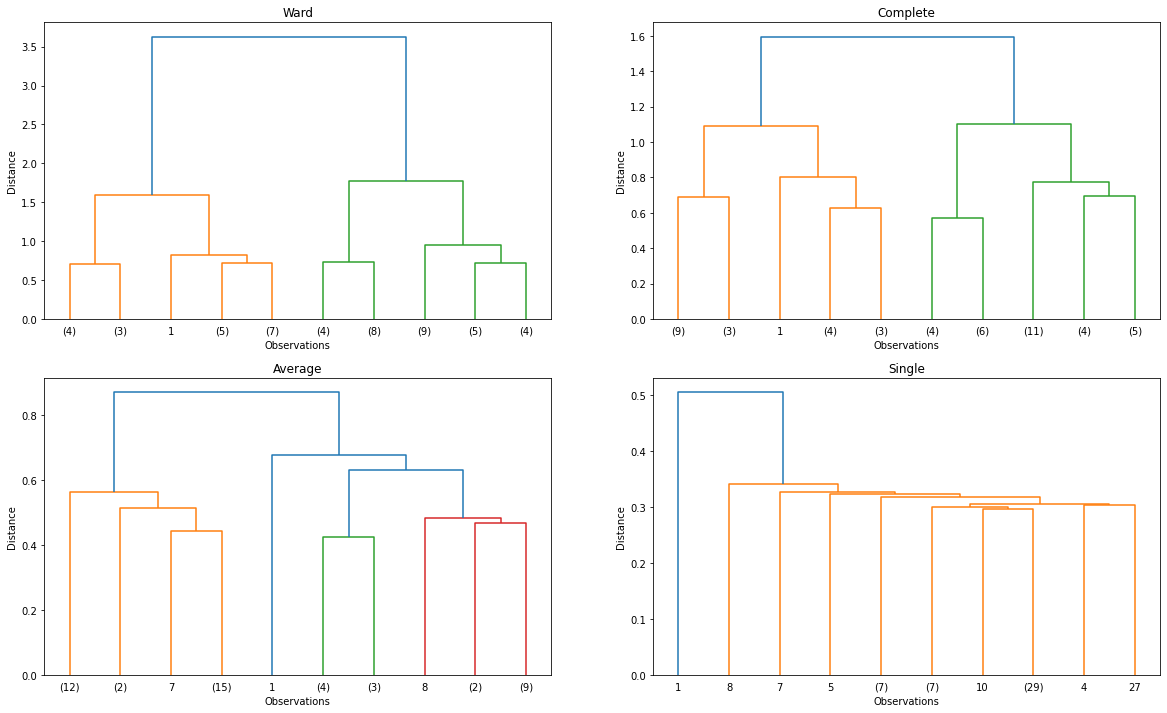

In [24]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

## Hierarchical Clustering (Agglomerative)

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distanc

In [25]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters. 
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.5406742439027667
Silhouette Score for 3 clusters: 0.35867841933636974
Silhouette Score for 4 clusters: 0.19574129619567182
Silhouette Score for 5 clusters: 0.08372985630683068
Silhouette Score for 6 clusters: -0.0009786026955674342
Silhouette Score for 7 clusters: -0.10043609614774641
Silhouette Score for 8 clusters: -0.05885457794822918
Silhouette Score for 9 clusters: -0.06385273624879925


In [29]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X)

In [30]:
X.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


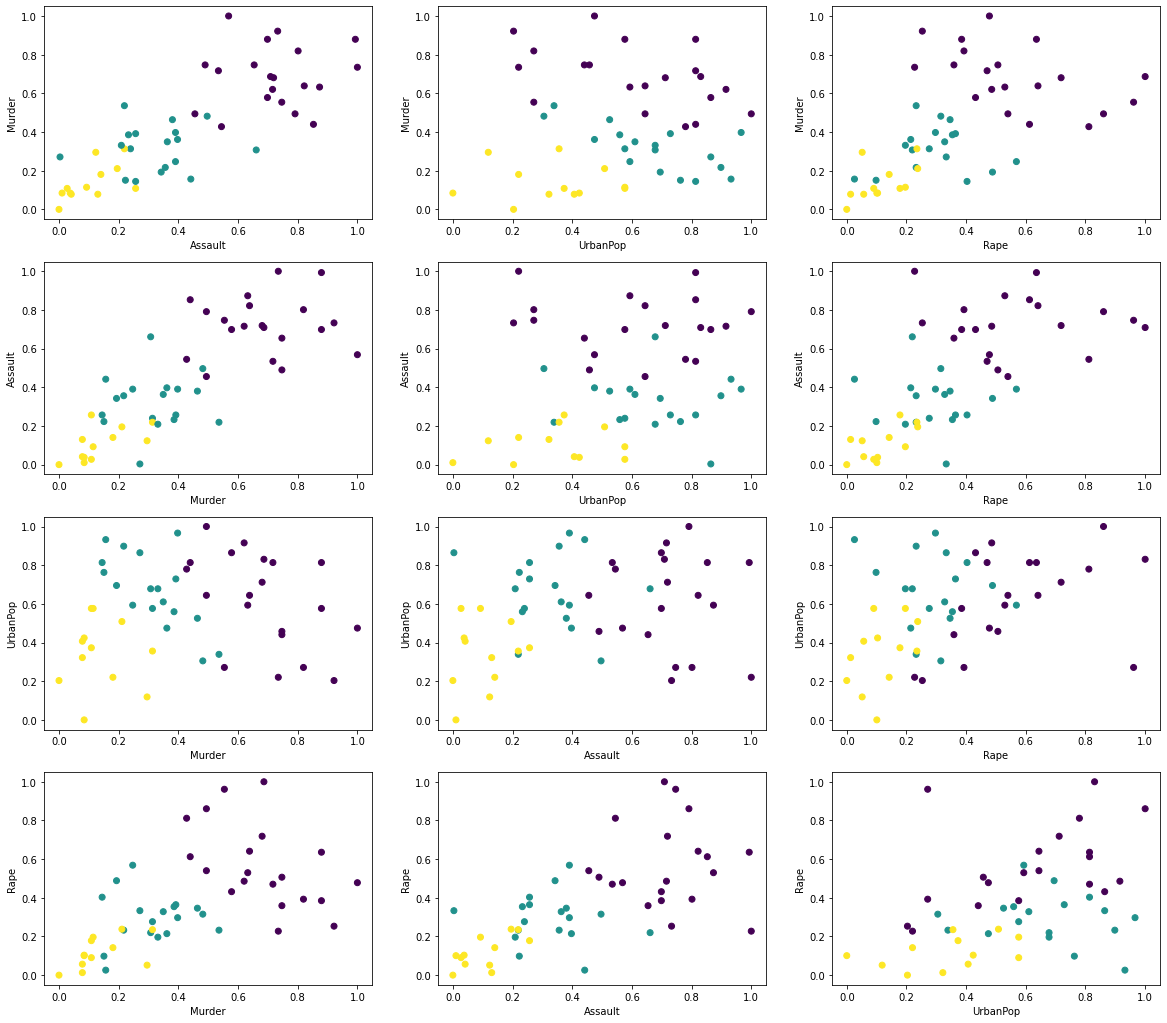

In [31]:
plt.figure(figsize = (20,18))
plot_number = 1
for i in X:
    for j in X:
        if j!=i:
            plt.subplot(4,3,plot_number)
            plt.scatter(X[j], X[i], c = clusters, cmap = "viridis")
            plt.xlabel(j)
            plt.ylabel(i)
            plot_number += 1

In [32]:
X["cluster"] = clusters
X.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0


In [33]:
clus_pred = X.groupby("cluster").mean().T
clus_pred

cluster,0,1,2
Murder,0.684639,0.316600,0.138052
Assault,0.720034,0.325533,0.106164
UrbanPop,0.616949,0.666667,0.340395
Rape,0.564987,0.294143,0.117140


<AxesSubplot:>

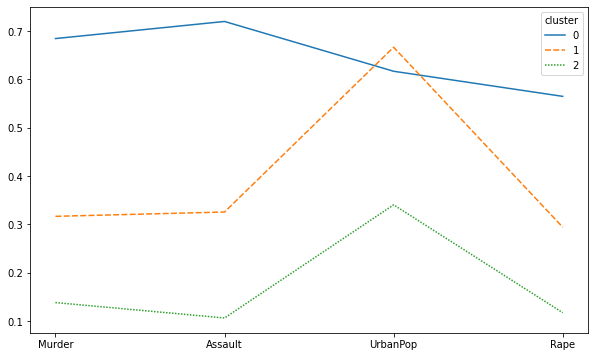

In [34]:
sns.lineplot(data = clus_pred)

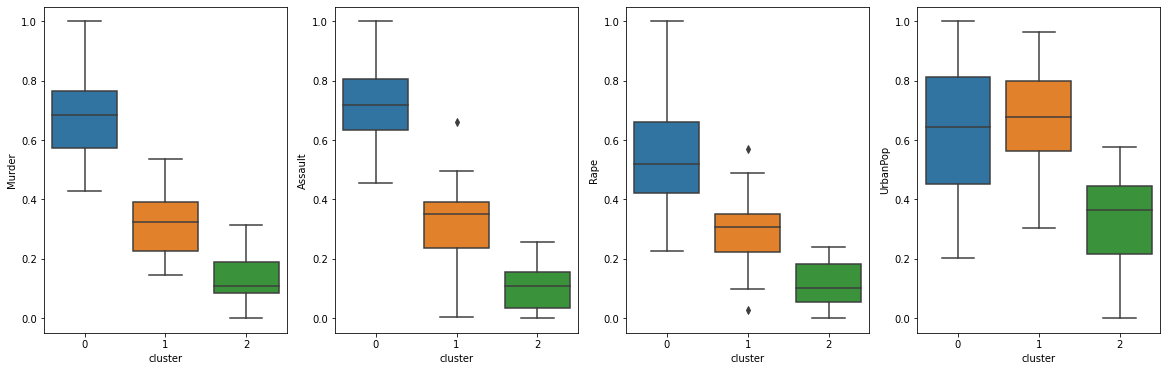

In [35]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Murder", x = "cluster", data = X)

plt.subplot(142)
sns.boxplot(y = "Assault", x = "cluster", data = X)

plt.subplot(143)
sns.boxplot(y = "Rape", x = "cluster", data = X)

plt.subplot(144)
sns.boxplot(y = "UrbanPop", x = "cluster", data = X);

In [36]:
X.cluster.value_counts()

0    20
1    18
2    12
Name: cluster, dtype: int64

In [37]:
X2 = X.iloc[:, [0,1,3]]
X2.head()

,Murder,Assault,Rape
0,0.746988,0.654110,0.359173
1,0.554217,0.746575,0.961240
2,0.439759,0.852740,0.612403
3,0.481928,0.496575,0.315245
4,0.493976,0.791096,0.860465


## Hopkins test

In [38]:
hopkins(X2, X2.shape[0])

0.3543956933157206

In [39]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

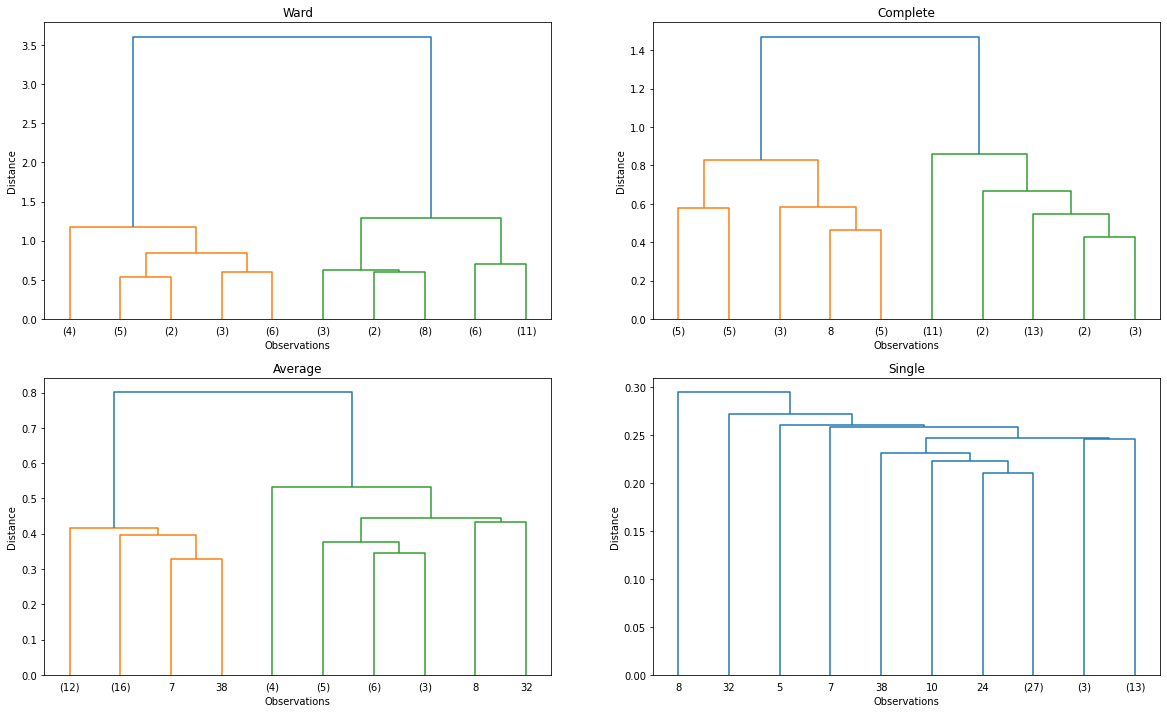

In [40]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

In [41]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.5406742439027667
Silhouette Score for 3 clusters: 0.33193668766161594
Silhouette Score for 4 clusters: 0.13774732005543386
Silhouette Score for 5 clusters: 0.13269348844287665
Silhouette Score for 6 clusters: 0.051863884277307114
Silhouette Score for 7 clusters: -0.05791022756192905
Silhouette Score for 8 clusters: -0.06533546010208166
Silhouette Score for 9 clusters: -0.025411681669985392
Silhouette Score for 10 clusters: 0.02417352208175959


In [42]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = final_model.fit_predict(X2)
X2["cluster"] = clusters

In [43]:
X2.cluster.value_counts()

0    20
1    17
2    13
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='Rape'>

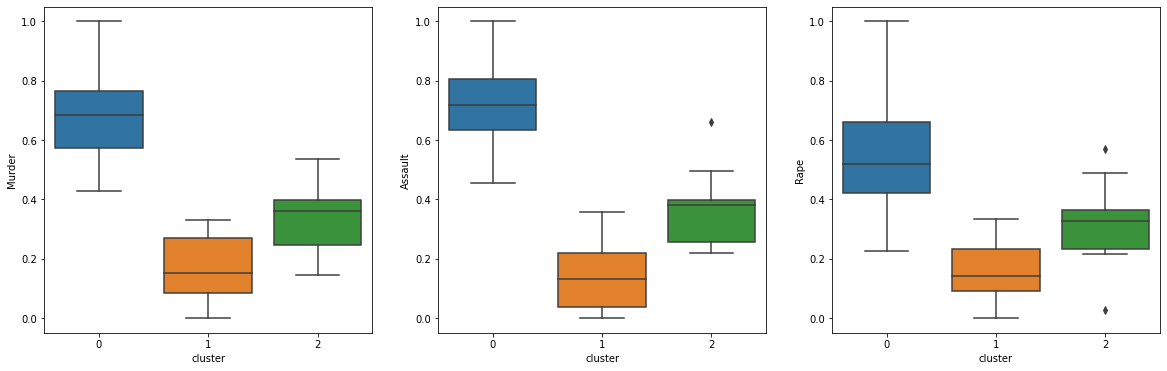

In [44]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Murder", x = "cluster", data = X2)

plt.subplot(132)
sns.boxplot(y = "Assault", x = "cluster", data = X2)

plt.subplot(133)
sns.boxplot(y = "Rape", x = "cluster", data = X2)

**Evaluation**

- 0 : states with high crime rates
- 1 : states with low crime rates
- 2 : states with medium crime rates

In [45]:
X2["crime_level"] = X2["cluster"].map({0:"high", 1:"low",2:"medium"})
X2.head()

,Murder,Assault,Rape,cluster,crime_level
0,0.746988,0.654110,0.359173,0,high
1,0.554217,0.746575,0.961240,0,high
2,0.439759,0.852740,0.612403,0,high
3,0.481928,0.496575,0.315245,2,medium
4,0.493976,0.791096,0.860465,0,high


In [46]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [47]:
X2["States"] = df.index
X2

,Murder,Assault,Rape,cluster,crime_level,States
0,0.746988,0.654110,0.359173,0,high,Alabama
1,0.554217,0.746575,0.961240,0,high,Alaska
2,0.439759,0.852740,0.612403,0,high,Arizona
3,0.481928,0.496575,0.315245,2,medium,Arkansas
4,0.493976,0.791096,0.860465,0,high,California
5,0.427711,0.544521,0.811370,0,high,Colorado
6,0.150602,0.222603,0.098191,1,low,Connecticut
7,0.307229,0.660959,0.219638,2,medium,Delaware
8,0.879518,0.993151,0.635659,0,high,Florida
9,1.000000,0.568493,0.478036,0,high,Georgia


In [48]:
X2[X2.crime_level=="low"]["States"]

6       Connecticut
10           Hawaii
11            Idaho
14             Iowa
15           Kansas
18            Maine
20    Massachusetts
22        Minnesota
25          Montana
26         Nebraska
28    New Hampshire
33     North Dakota
37     Pennsylvania
40     South Dakota
44          Vermont
47    West Virginia
48        Wisconsin
Name: States, dtype: object

In [49]:
X2[X2.crime_level=="high"]["States"]

0            Alabama
1             Alaska
2            Arizona
4         California
5           Colorado
8            Florida
9            Georgia
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
24          Missouri
27            Nevada
30        New Mexico
31          New York
32    North Carolina
39    South Carolina
41         Tennessee
42             Texas
Name: States, dtype: object

In [50]:
X2[X2.crime_level=="medium"]["States"]

3         Arkansas
7         Delaware
13         Indiana
16        Kentucky
29      New Jersey
34            Ohio
35        Oklahoma
36          Oregon
38    Rhode Island
43            Utah
45        Virginia
46      Washington
49         Wyoming
Name: States, dtype: object